##Capstone Project Data Science: Fraud Detection Analysis
##Project Overview
The goal of this project is to develop a machine learning model for detecting fraudulent transactions using the creditcard.csv dataset. The project encompasses the entire pipeline from data preprocessing to model deployment.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
# Load the dataset
df = pd.read_csv('creditcard.csv')


In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Understanding Feature Relationships
Correlation Matrix: Helps identify relationships between features and detect multicollinearity.
Use Seaborn to visualize the correlation matrix.

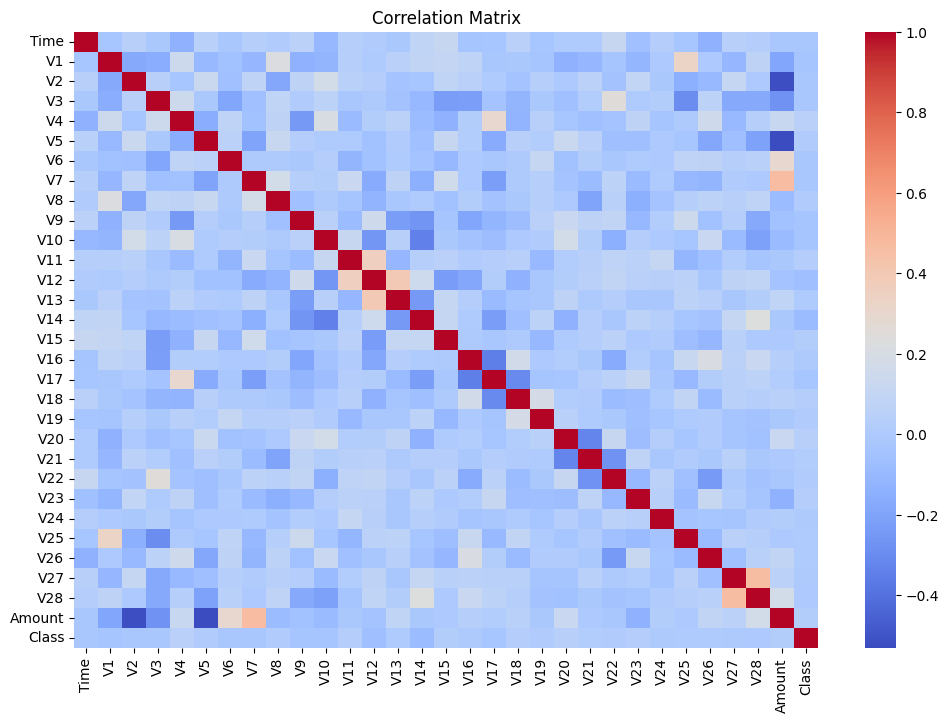

In [8]:
# Plotting the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

##Data Preprocessing
##Handling Missing Values
Data Completeness: Ensures accuracy and reliability of the model.
Bias Prevention: Avoids incorrect model predictions due to incomplete data.

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


##Addressing Outliers
Impact on Performance: Outliers can skew the model's understanding.
Detection and Treatment: Identify using statistical methods and decide whether to remove or transform them.

In [10]:
# Example: Using IQR to detect outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
df = df[~outliers.any(axis=1)]


##Model Training
Gaussian Naive Bayes Assumptions
Feature Independence: Assumes features are independent given the class.
Normal Distribution: Assumes continuous features follow a Gaussian distribution.
Handling Imbalanced Datasets
Resampling: Use oversampling or undersampling techniques.
Synthetic Data: Generate samples using SMOTE.
Class Weights: Adjust weights assigned to each class.

In [13]:
from imblearn.over_sampling import SMOTE

X = df.drop('Class', axis=1)
y = df['Class']

# Check the unique classes in your target variable
print(y.unique())

# If only one class remains, SMOTE cannot be applied.
# You might need to revisit your outlier removal strategy or consider a different approach if your data truly has only one class after cleaning.

# If there are multiple classes, proceed with SMOTE:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

[0.]


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


NameError: name 'X_resampled' is not defined

In [16]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')


NameError: name 'y_test' is not defined

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


NameError: name 'y_test' is not defined

In [18]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


NameError: name 'y_test' is not defined

In [19]:
# Example: Creating a new feature
df['TransactionHour'] = df['Time'] // 3600


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')


NameError: name 'np' is not defined

In [21]:
# Example: Simple monitoring system using logging
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def monitor_model(predictions):
    fraud_count = sum(predictions)
    logger.info(f"Detected {fraud_count} fraudulent transactions.")


In [22]:
from sklearn.model_selection import StratifiedKFold

stratified_kf = StratifiedKFold(n_splits=5)
for train_index, test_index in stratified_kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


ValueError: Input y contains NaN.